Nama: Raden Rizki

Kelas: TI-3F

No. Absen: 25

NIM: 2141720064

**UJIAN TENGAH SEMESTER PEMBELAJARAN MESIN**

# Segmentasi Gambar dengan Clustering

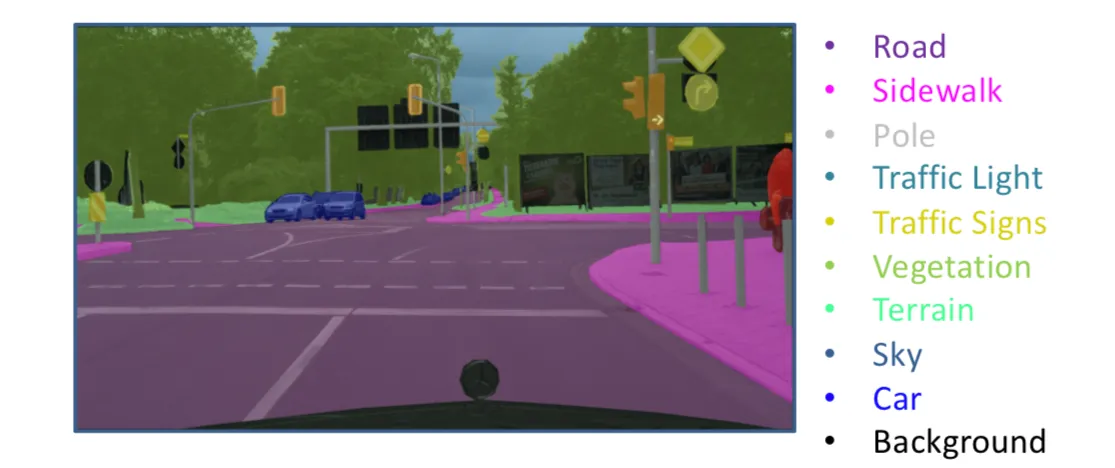

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

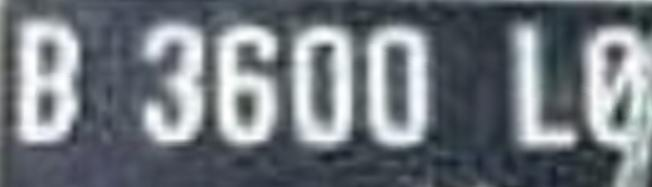

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


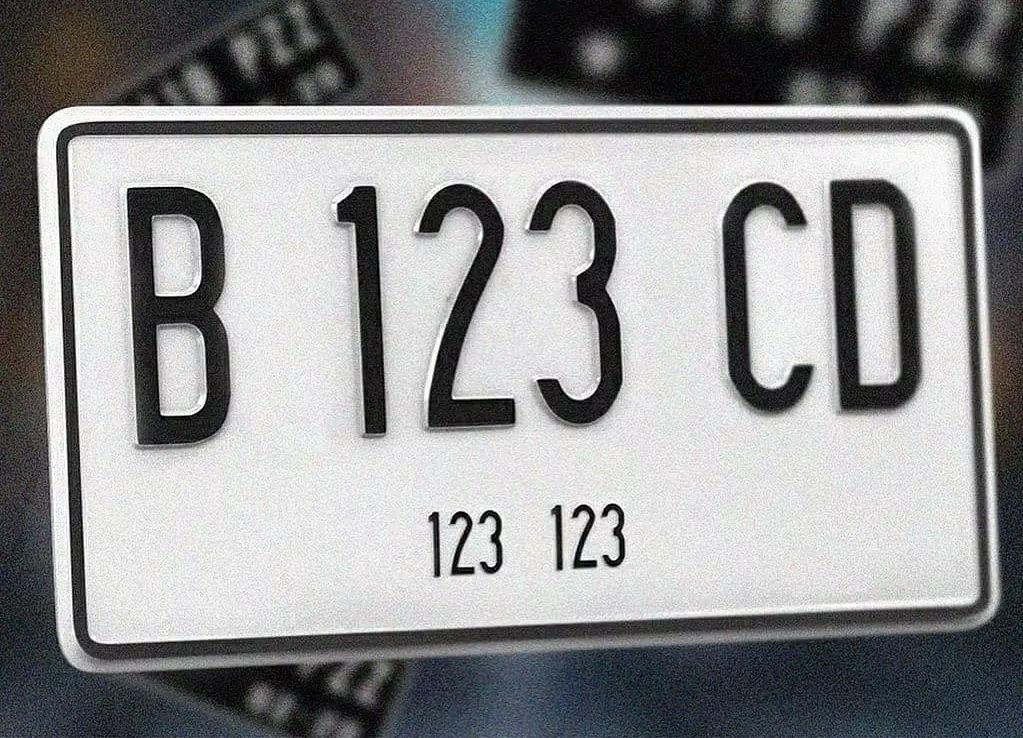

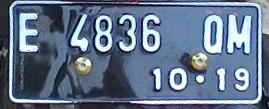

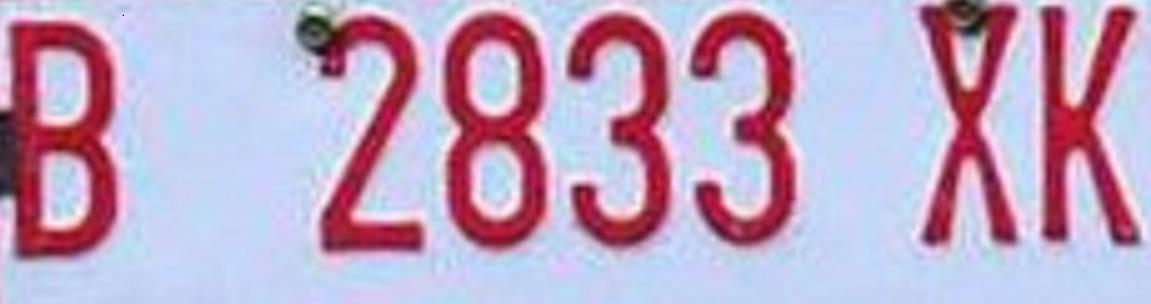

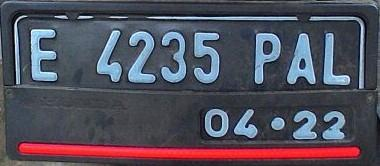

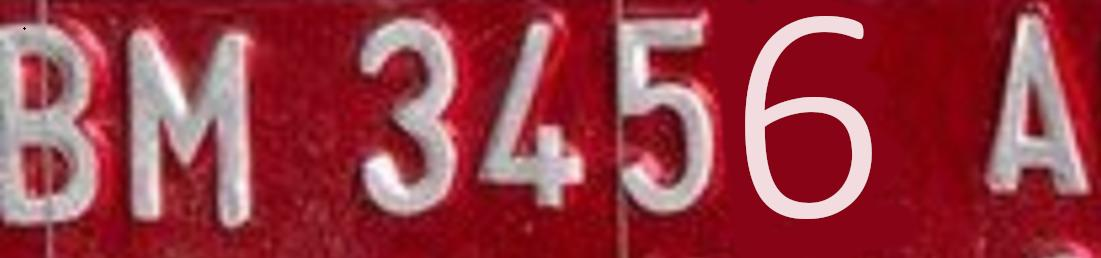

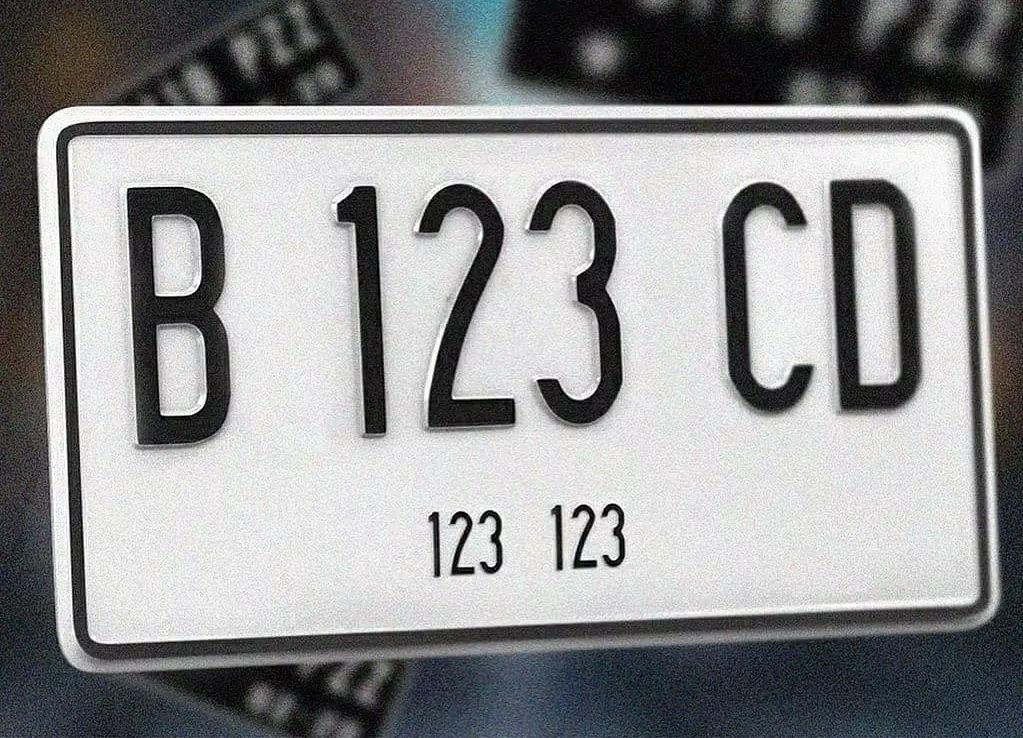

In [3]:
# List Image dalam Folder
list_img = []
for image in glob.glob('/content/drive/MyDrive/Images/dummy/*.jpg'):
  img = cv.imread(image)
  list_img.append(img)

# Tampilkan gambar
cv2_imshow(img)
for i in list_img:
  cv2_imshow(i)

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import glob

In [5]:
def show_image_shape(img):
  h, w, c = img.shape
  print(f'height: {h}, weight: {w}, channel: {c}')

for i in list_img:
  show_image_shape(i)

height: 109, weight: 269, channel: 3
height: 304, weight: 1151, channel: 3
height: 166, weight: 380, channel: 3
height: 258, weight: 1101, channel: 3
height: 738, weight: 1023, channel: 3


In [14]:
def get_data(img):
  h, w, c = img.shape

  data = img / 255.0
  data = data.reshape(h * w, c)

  return data

for i in list_img:
  data = get_data(i)
  print(data.shape)

(29321, 3)
(349904, 3)
(63080, 3)
(284058, 3)
(754974, 3)


In [15]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

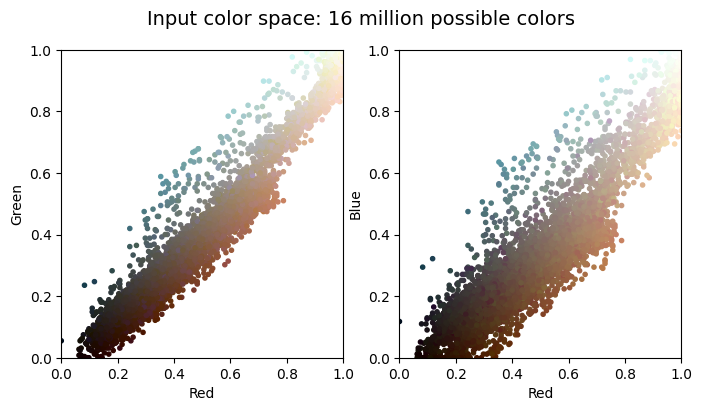

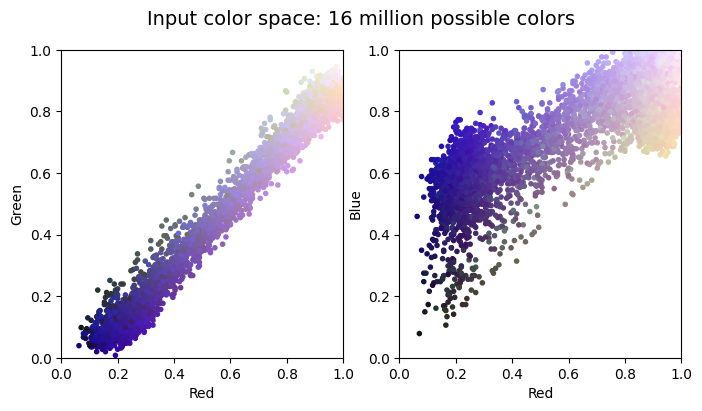

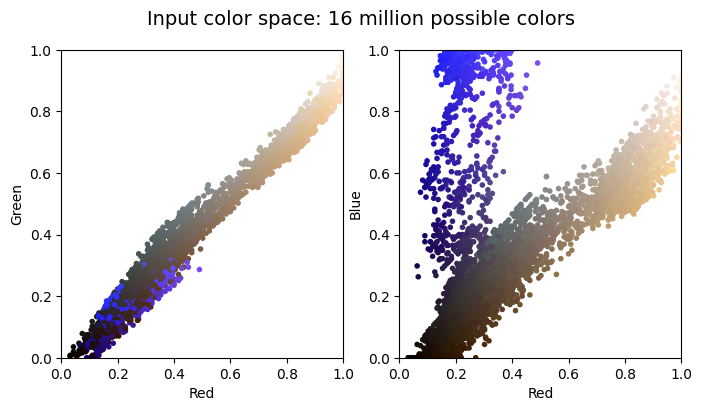

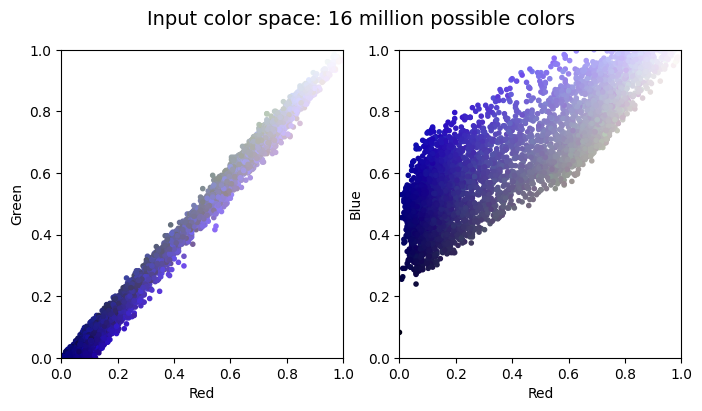

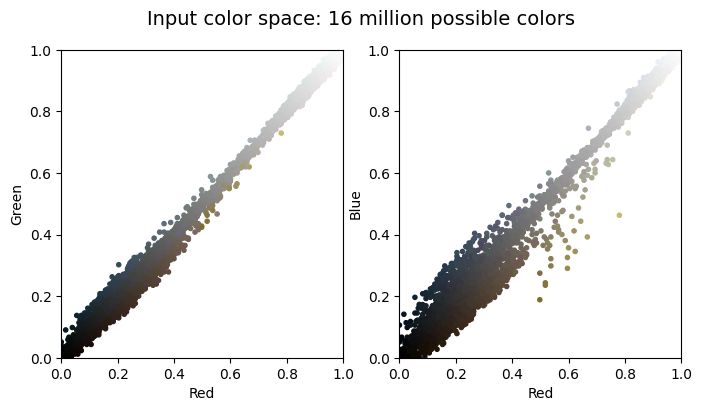

In [16]:
for i in list_img:
  data = get_data(i)
  plot_pixels(data, title='Input color space: 16 million possible colors')

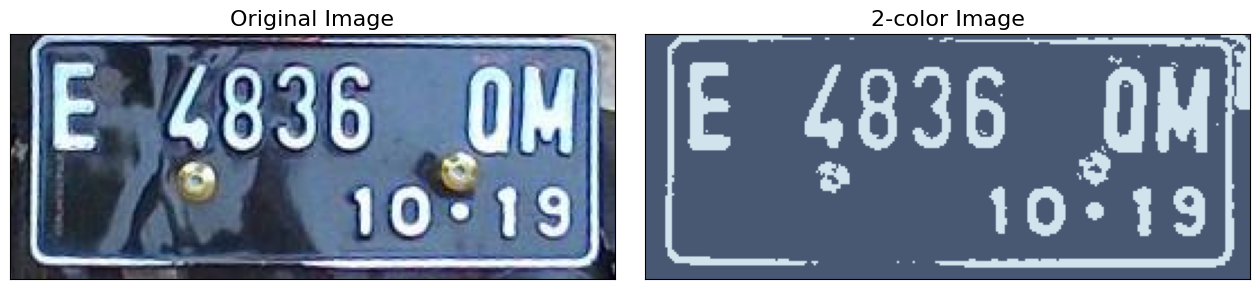

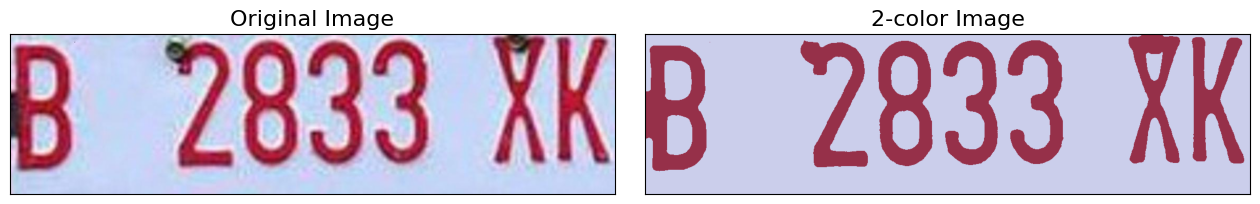

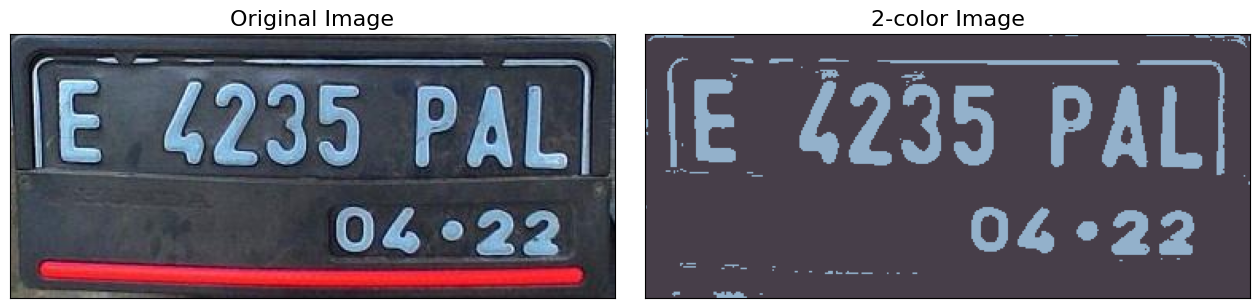

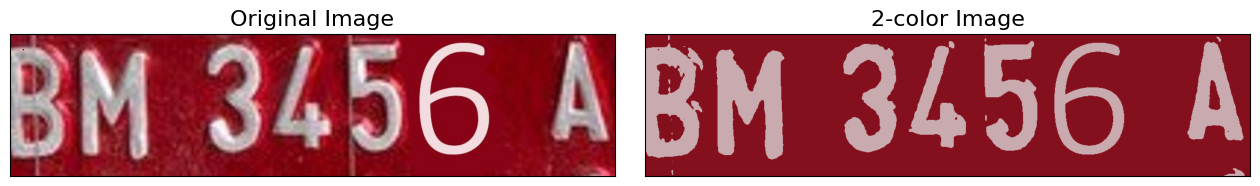

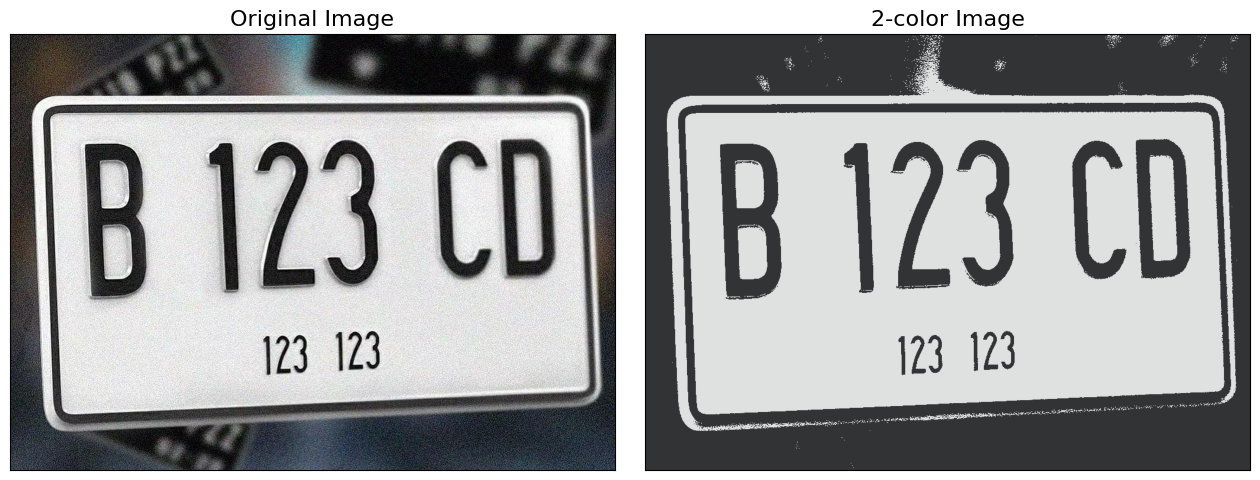

In [21]:
from sklearn.cluster import KMeans

def get_segmentation_image(img):
  data = get_data(img)

  # KMeans
  kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
  kmeans.fit(data)
  centers = kmeans.cluster_centers_

  new_colors = centers[kmeans.labels_]
  img_recolored = new_colors.reshape(img.shape)
  return img_recolored

def show_comparasion_image(img1, img2):
  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(img1)
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(img2)
  ax[1].set_title('2-color Image', size=16)

for img in list_img:
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_recolored = get_segmentation_image(img_rgb)
  show_comparasion_image(img_rgb, img_recolored)